# 5. Data Exploration
5-1. Split the data (train/test)  
5-2. Basic Exploration   
5-3. Missing Value   

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

#匯入自己寫的程式
import dataframe_format as ff
import human_read_data as hr
import plot_analysis as pa

In [2]:
df = pd.read_csv('4_data_cleaning_columns.csv')

In [3]:
df = ff.reindex_columns_all(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149355 entries, 0 to 149354
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Identifier          149355 non-null  object 
 1   Num_Land            149355 non-null  int64  
 2   Num_Building        149355 non-null  int64  
 3   Num_ParkingSpace    149355 non-null  int64  
 4   Storeys             149297 non-null  float64
 5   Floor_Arabic        149355 non-null  float64
 6   Num_Floors          149355 non-null  float64
 7   HouseAge            137792 non-null  float64
 8   CompletionDate_AD   137792 non-null  float64
 9   TransactionDate_AD  149355 non-null  int64  
 10  Bedrooms            149355 non-null  int64  
 11  LivingRooms         149355 non-null  int64  
 12  Bathrooms           149355 non-null  int64  
 13  TotalArea           149355 non-null  float64
 14  LandArea            149355 non-null  float64
 15  PrimaryArea         149355 non-nul

In [4]:
df.head()

,Identifier,Num_Land,Num_Building,Num_ParkingSpace,Storeys,Floor_Arabic,Num_Floors,HouseAge,CompletionDate_AD,TransactionDate_AD,...,Num_Railway,Num_Primary_School,Num_Sec_School,NIMBY_Dist,Hospital_Dist,Metro_Dist,Railway_Dist,Primary_Dist,Sec_Dist,TotalPrice
0,RPQNMLMJJIHFFAA98CA,1,1,1,14.0,7.0,1.0,12.0,200011.0,201210,...,0,1,2,3085.370451,1677.933925,1575.080796,7272.308437,32.314377,460.068302,13550000
1,RPSNMLMJJIHFFAA56CA,1,1,0,7.0,6.0,1.0,15.0,199712.0,201210,...,0,1,1,2637.528281,2801.051060,1661.027469,7309.471279,161.685187,160.176142,17700000
2,RPQNMLNJJIHFFAA09CA,1,1,0,4.0,1.0,1.0,NaN,NaN,201210,...,0,2,1,3341.303288,1969.616513,1811.487456,7524.094945,259.510940,464.558824,9900000
3,RPXOMLQJJIHFFAA57CA,2,1,1,9.0,8.0,1.0,3.0,200911.0,201210,...,0,2,1,2225.047929,827.593155,741.470209,5966.722397,71.688533,302.054926,8010000
4,RPUOMLNLJIHFFAA17CA,0,1,0,16.0,11.0,1.0,15.0,199708.0,201210,...,0,2,0,3418.991382,1842.879689,224.857500,5042.524883,244.259466,936.289347,7800000


# 5-1. Split the data (train/test)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop(['TotalPrice'], axis=1)
y = df['TotalPrice']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
df_train = x_train.join(y_train)
df_test = x_test.join(y_test)
df_train.head()

,Identifier,Num_Land,Num_Building,Num_ParkingSpace,Storeys,Floor_Arabic,Num_Floors,HouseAge,CompletionDate_AD,TransactionDate_AD,...,Num_Railway,Num_Primary_School,Num_Sec_School,NIMBY_Dist,Hospital_Dist,Metro_Dist,Railway_Dist,Primary_Dist,Sec_Dist,TotalPrice
28163,RPPNMLOJPHJFFAA17CA,1,1,0,5.0,2.0,1.0,31.0,198309.0,201405,...,0,1,1,1927.848709,986.810123,580.619237,5518.296523,434.611897,232.583754,11300000
90656,RPPSMLSJJIOFFCA28CA,3,1,0,18.0,10.0,1.0,9.0,201009.0,201910,...,0,3,2,5737.663362,1252.993661,30.933473,1646.111526,289.361797,265.468281,15930000
79903,RPSNMLTLQHNFFFA56CA,2,1,1,14.0,13.0,1.0,-2.0,201804.0,201601,...,0,1,2,4111.327471,828.428002,355.217298,2511.303778,332.255267,141.307329,33000000
40123,RPRNMLTLOHKFFAA08CA,1,1,0,4.0,1.0,1.0,38.0,197705.0,201504,...,0,2,2,2774.267401,1075.894739,815.794335,6311.609820,137.567134,240.123920,13000000
75908,RPSNMLOKOHNFFAA87CA,1,1,1,12.0,6.0,1.0,0.0,201801.0,201804,...,0,2,2,2769.399126,2020.580964,1371.877712,7063.465463,432.853701,376.047718,55500000


In [9]:
df_train.to_csv('df_train.csv', encoding='utf-8-sig', index=False)
df_test.to_csv('df_test.csv', encoding='utf-8-sig', index=False)

# 5-2. Basic Exploration

In [10]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])

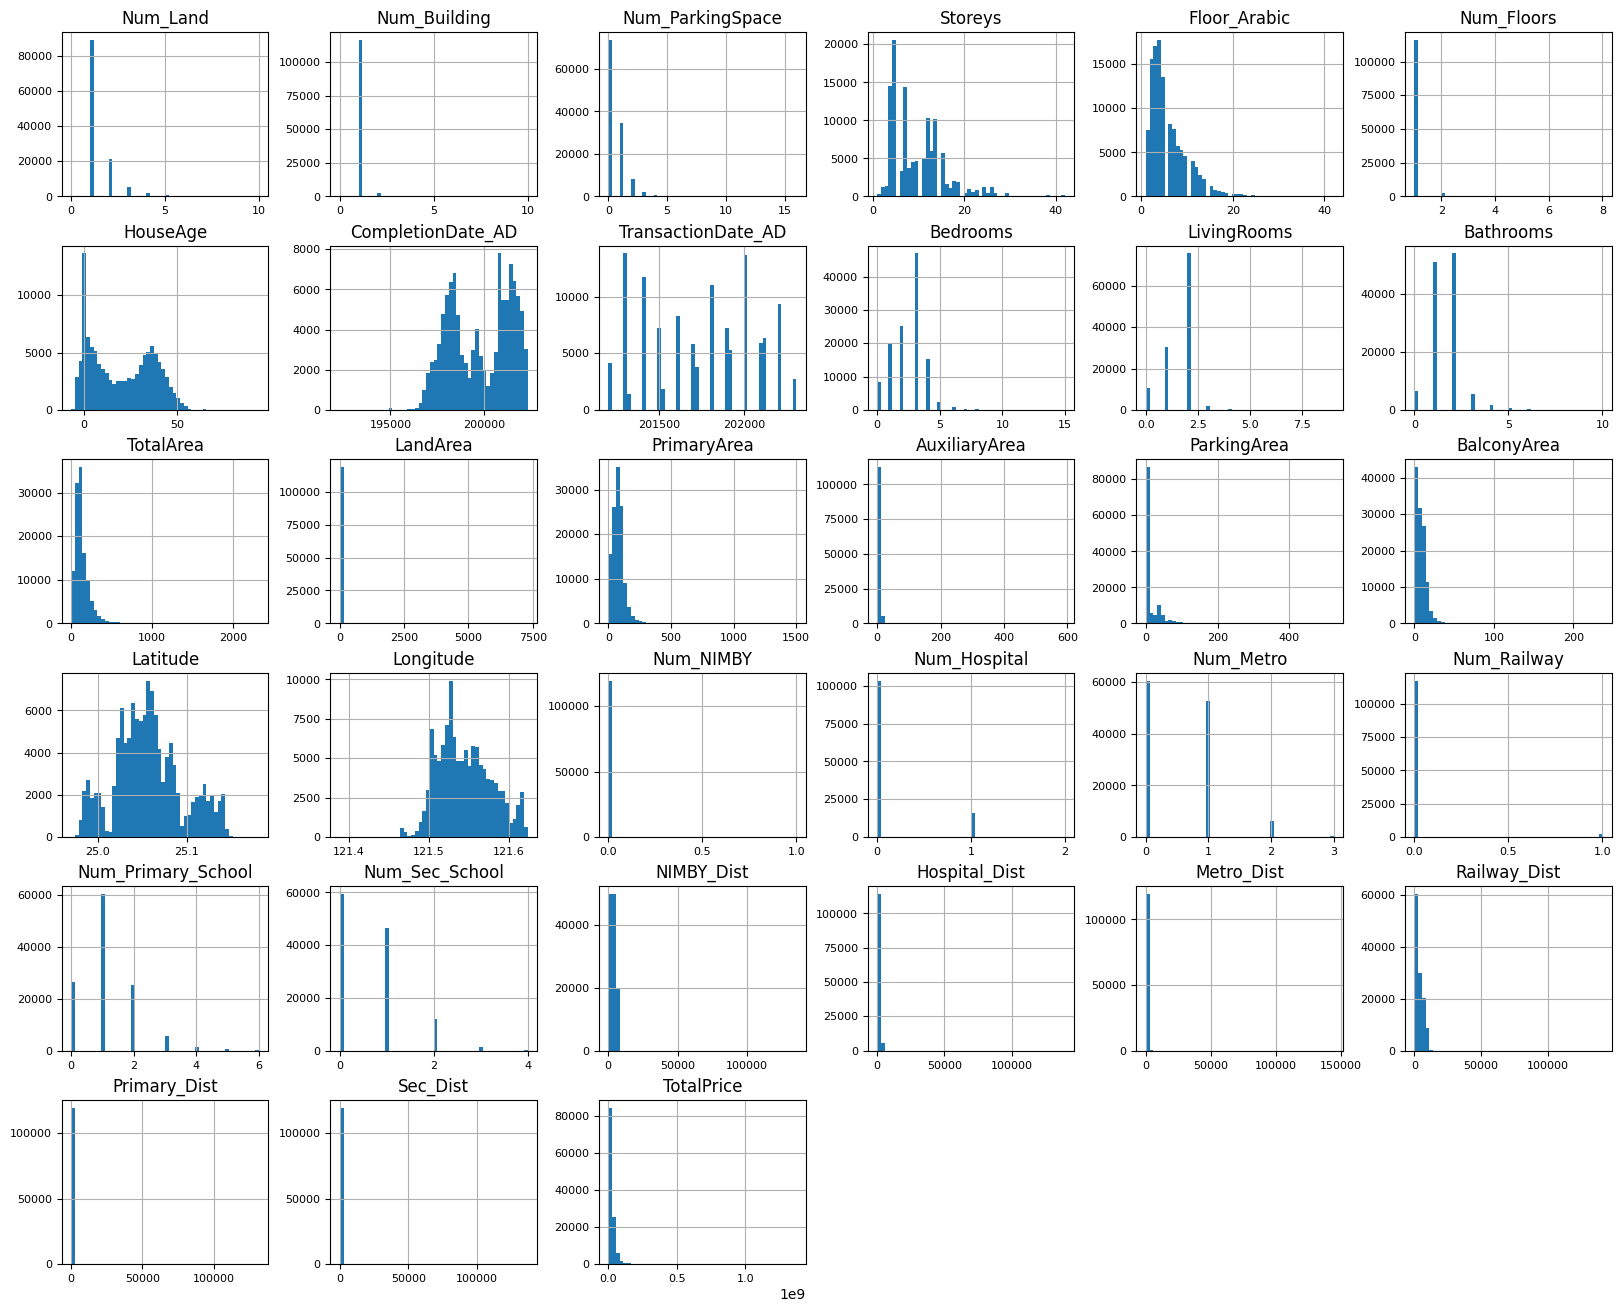

In [11]:
df_num.hist(figsize=(20, 16), bins=50, xlabelsize=8, ylabelsize=8);

In [12]:
# summary statistics for numerical features
summary_stats = df_num.describe().T.round(2)
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
Num_Land,119484.0,1.39,0.89,0.00,1.00,1.00,2.00,1.000000e+01
Num_Building,119484.0,1.03,0.21,0.00,1.00,1.00,1.00,1.000000e+01
Num_ParkingSpace,119484.0,0.51,0.79,0.00,0.00,0.00,1.00,1.600000e+01
Storeys,119440.0,9.90,5.72,1.00,5.00,9.00,13.00,4.200000e+01
Floor_Arabic,119484.0,5.88,4.21,1.00,3.00,5.00,8.00,4.200000e+01
Num_Floors,119484.0,1.04,0.27,1.00,1.00,1.00,1.00,8.000000e+00
HouseAge,110223.0,20.00,16.59,-7.00,4.00,19.00,35.00,9.400000e+01
CompletionDate_AD,110223.0,199750.78,1618.78,192307.00,198301.00,199805.00,201303.00,2.023030e+05
TransactionDate_AD,119484.0,201745.42,315.32,201201.00,201411.00,201803.00,202008.00,2.023050e+05
Bedrooms,119484.0,2.47,1.28,0.00,2.00,3.00,3.00,1.500000e+01


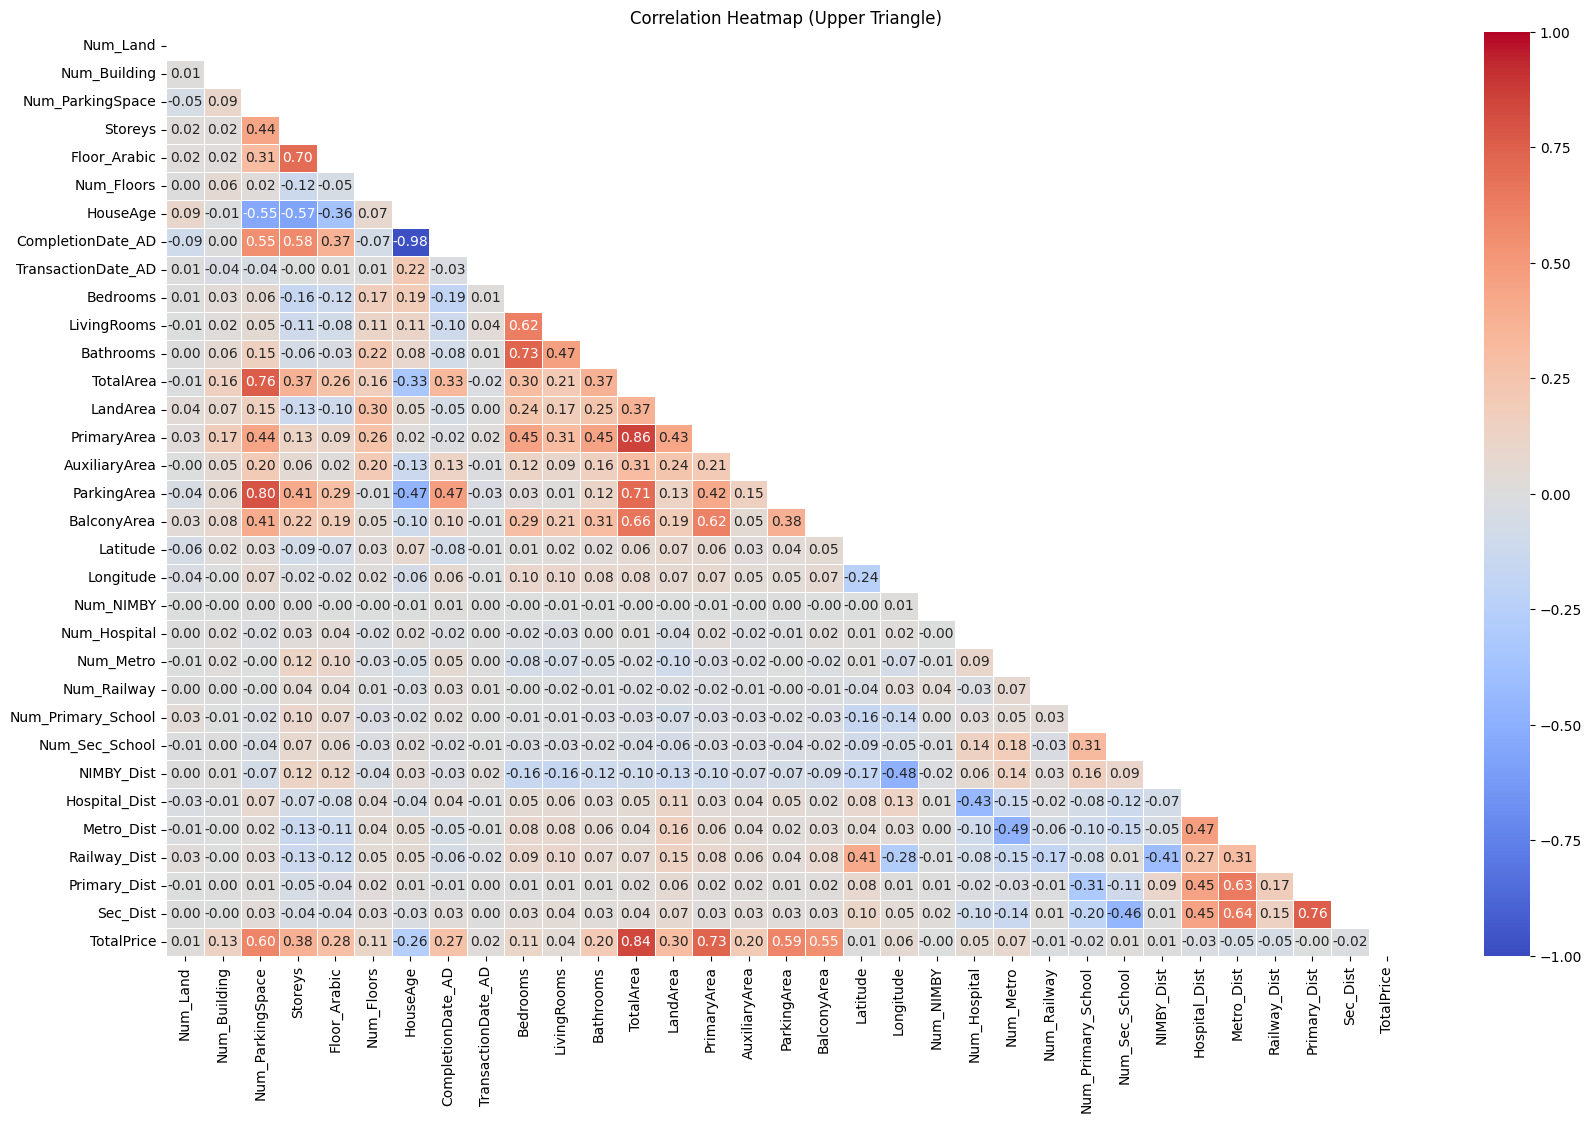

In [13]:
# Calculate the correlation coefficient matrix
pa.all_corr_heatmap(df)

# 5-3. Missing Value
Storeys (總樓層數)

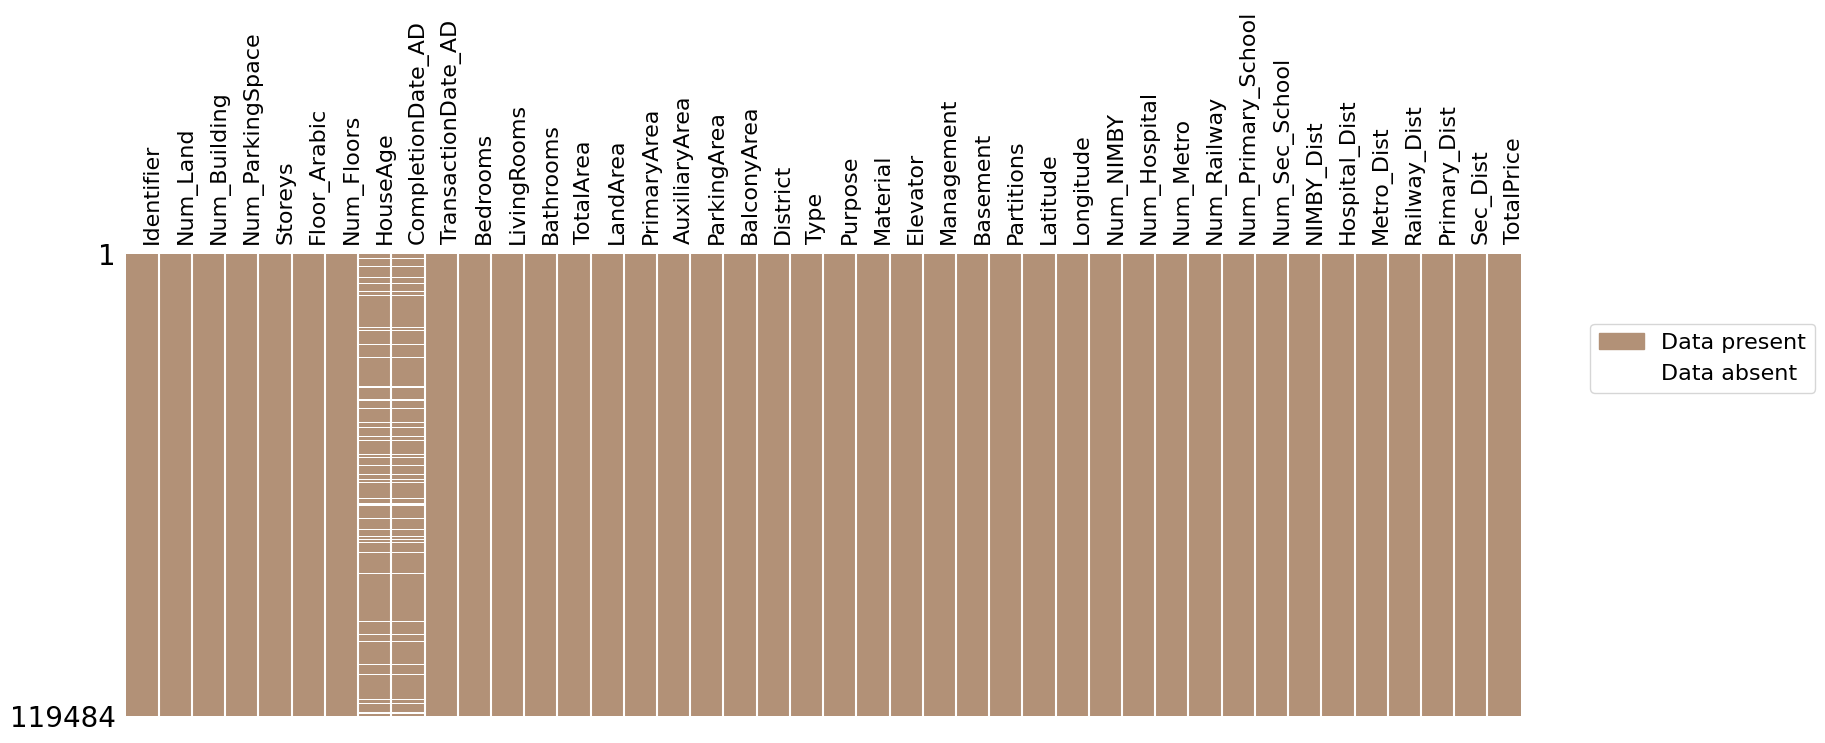

In [14]:
msno.matrix(df_train, sparkline=False, figsize=(18,6), fontsize=16, color=(0.7, 0.57, 0.47));
gray_patch = mpatches.Patch(color='#B29177', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')
plt.legend(loc=[1.05,0.7], handles=[gray_patch, white_patch], fontsize=16)
plt.xticks(range(len(df_train.columns)), df_train.columns, rotation=90)
plt.show()

In [15]:
#查看各欄位缺失植數量
missing_values = df_train.isna().sum()
missing_value_true = missing_values[missing_values > 1]
print(missing_value_true)

Storeys                44
HouseAge             9261
CompletionDate_AD    9261
dtype: int64


# Storeys (總樓層數)

In [16]:
# Storeys缺失值數量
print(f"總筆數: {len(df_train)}")
print(f"Storeys 缺失值數量: {len(df_train) - df_train['Storeys'].count()}")
percentage = 100 * (len(df_train)-df_train['Storeys'].count())/len(df_train)
print("Missing value percentage (%): {:.2f}".format(percentage))

總筆數: 119484
Storeys 缺失值數量: 44
Missing value percentage (%): 0.04


In [17]:
# 缺失值比例少，可直接刪除
df_train.dropna(subset=['Storeys'], axis=0,inplace=True)

In [18]:
# Storeys缺失值數量
print(f"總筆數: {len(df_train)}")
print(f"Storeys 缺失值數量: {len(df_train) - df_train['Storeys'].count()}")
percentage = 100 * (len(df_train)-df_train['Storeys'].count())/len(df_train)
print("Missing value percentage (%): {:.2f}".format(percentage))

總筆數: 119440
Storeys 缺失值數量: 0
Missing value percentage (%): 0.00


In [19]:
df_train.to_csv('df_train.csv', encoding='utf-8-sig', index=False)